In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('sales.csv', index_col = 0)
df.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [3]:
df.shape

(200, 4)

### Features are:
1. TV
2. Radio
3. Newspaper

### Response is
Sales

Response variable is continous, hence, it is a Regression problem

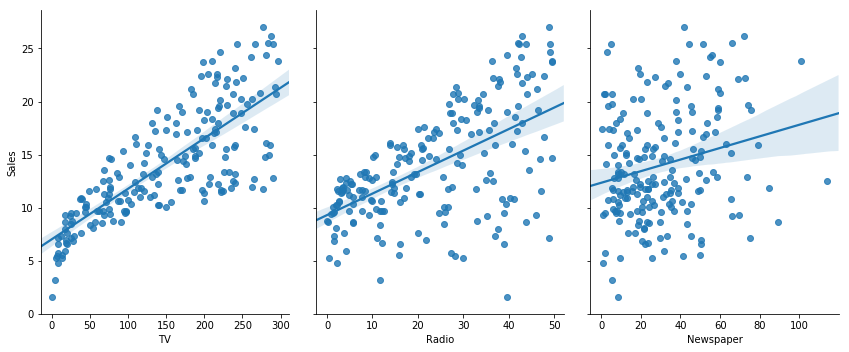

In [4]:
sns.pairplot(x_vars = ['TV', 'Radio', 'Newspaper'], y_vars = 'Sales', data = df, size = 5, aspect = 0.8, kind = 'reg')

# kind reg gives best fit line with 95% confidence

## Linear Regression

### Pros:
1. No tuning required (unlike tuning value of k in KNN model)
2. Easy to understand
3. Fast
4. Highly interpretable

### Cons:
1. Unlikely to predict the best accuracy

#### Form of Linear Regression
 y = B0 + B1*x1 + B2*x2 +.....+ Bn*xn
 
 B values are the model co-efficients. These values are learned during training the model using the 'least square criterion'

### From the datset
y = B0 + B1*TV + B1*Radio + B2*Newspaper

### Preparing X and y using Pandas

In [5]:
feature_cols = ['TV', 'Radio', 'Newspaper']
X = df[feature_cols]
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [6]:
y = df[['Sales']]
y.head()

,Sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9


In [7]:
print(X.shape)
print(y.shape)

(200, 3)
(200, 1)


### Splitting up the train and test sets

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [9]:
# default split is 75% - 25%
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140, 1)
(60, 1)


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting Model Coefficients

In [12]:
print(reg.intercept_)
print(reg.coef_)

# Underscore is scikit-learn convention for any attributes that were estimated from the data

[2.93721573]
[[0.04695205 0.17658644 0.00185115]]


In [13]:
zipped = list(zip(feature_cols, reg.coef_))
print(zipped)

[('TV', array([0.04695205, 0.17658644, 0.00185115]))]


### Making Prediction

In [14]:
y_pred = reg.predict(X_test)

### Evaluation
Evaluation metrtics such as 'accuracy' are not useful for regression problems

In [15]:
# Example
# define True and Predicted values

true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

from sklearn import metrics

#### Mean Absolute Error (MAE)
Mean of the absolute values of the error

In [16]:
mae = (abs(100-90) + abs(50-50) + abs(30+50) + abs(20-30))/4
print(mae)
print(metrics.mean_absolute_error(true, pred))

25.0
10.0


#### Mean Squared Error (MSE)

Mean of the square of the error

In [17]:
mse = ((100-90)**2 + (50-50)**2 + (30-50)**2 + (20-30)**2)/4
print(mse)
print(metrics.mean_squared_error(true, pred))

150.0
150.0


#### Root Mean Squared Error (RMSE)
Mean of the 

In [18]:
rmse = np.sqrt(((100-90)**2 + (50-50)**2 + (30-50)**2 + (20-30)**2)/4)
print(rmse)
print(np.sqrt(metrics.mean_squared_error(true, pred)))

12.24744871391589
12.24744871391589


Comaprison
1. MAE - easy to interpret and understand
2. MSE - more popular than MAE as it punishes large errors
3. RMSE - More popular because it interpet MSE in y units

#### Computing RMSE for our Sales prediction


In [19]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.3888574107756972


#### Feature Selection

Does the Newspaper has any significant impact in our prediction

In [20]:
feature_cols = ['TV', 'Radio']
X = df[feature_cols]
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# error got minimized.

1.383728668840889
